# 시각화 기법

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df_abnb = pd.read_csv("data/ABNB_stock.csv")

<Axes: xlabel='Date', ylabel='Close'>

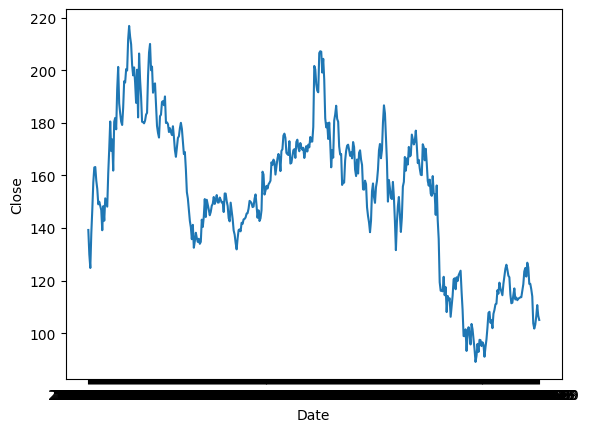

In [4]:
# 날짜 별로 종가를 선으로 연결해주는 차트
fig, ax = plt.subplots()
sns.lineplot(data= df_abnb, x= 'Date',y ='Close', ax = ax) # 날짜가 겹쳐서 검은색으로 보이지 않음.

In [5]:
# 문자열을 datetime으로 변환
df_abnb["Date"] = pd.to_datetime(df_abnb["Date"])

<Axes: xlabel='Date', ylabel='Close'>

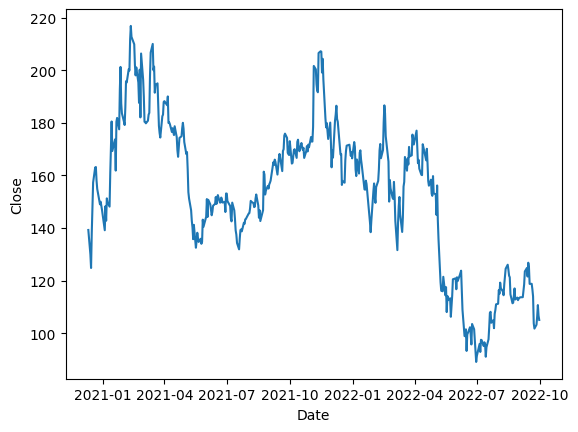

In [6]:
fig, ax = plt.subplots()
sns.lineplot(data= df_abnb, x= 'Date',y ='Close', ax = ax)

축 레벨 회전, 표현 방식을 변경 -> fomatter 사용

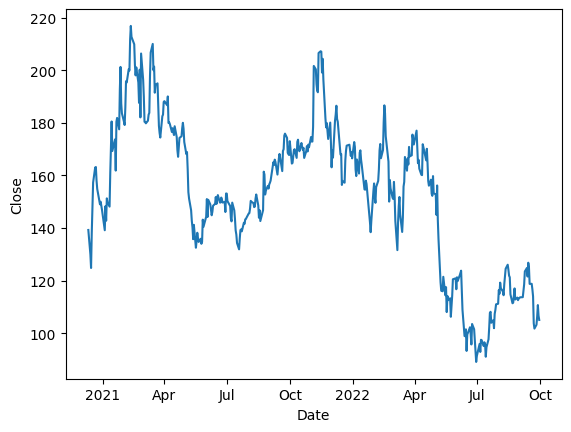

In [7]:
import matplotlib as mpl

fig, ax = plt.subplots()
sns.lineplot(data=df_abnb, x='Date', y='Close', ax=ax)
ax.xaxis.set_major_formatter(mpl.dates.ConciseDateFormatter(ax.xaxis.get_major_locator()))


In [8]:
# ployly line chart
import plotly.express as px
px.line(data_frame=df_abnb, x='Date', y= 'Close', width=600, height=400)

포멧지정가능

In [9]:
fig = px.line(data_frame=df_abnb, x='Date', y= 'Close', width=600, height=400)
fig.update_xaxes(tickformat = '%Y-%m-%d')

# 다중 축 차트

기본 차트 x,y + y1, y2 -> 하나의 ax그리기

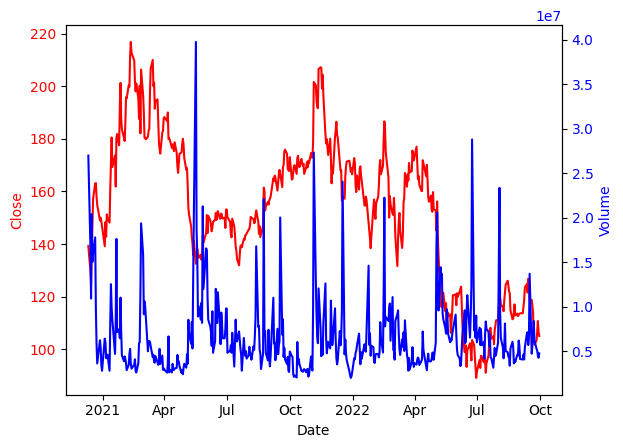

In [10]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
sns.lineplot(x='Date', y='Close', data = df_abnb, ax= ax, color = 'red')
sns.lineplot(x='Date', y='Volume', data = df_abnb, ax= ax2, color = 'blue')

# 왼쪽의 y축 정보 설정
ax.tick_params(axis='y', labelcolor = 'red')
ax.yaxis.label.set_color('red')

# 오른쪽의 y축 정보 설정
ax2.tick_params(axis='y', labelcolor = 'blue')
ax2.yaxis.label.set_color('blue') 

# x축 날짜 포맷 지정하기
ax.xaxis.set_major_formatter(mpl.dates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

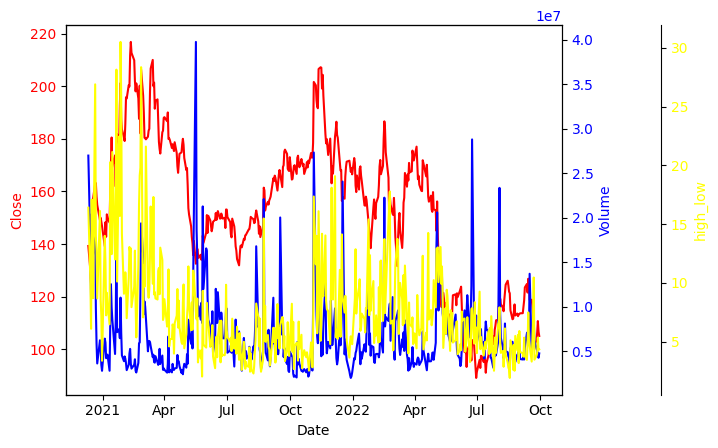

In [11]:
# 축 3개 그리기
# 파생변수: 최고가 - 최저가 = high_low 변수 추가
df_abnb['high_low'] = df_abnb['High'] - df_abnb['Low']

fig, ax = plt.subplots()
ax2 = ax.twinx()
ax3 = ax.twinx()

ax3.spines.right.set_position(('axes',1.2)) # 현재 축(1)에서 0.2 만큼 오른 쪽으로 이동
sns.lineplot(x='Date', y='Close', data = df_abnb, ax= ax, color = 'red')
sns.lineplot(x='Date', y='Volume', data = df_abnb, ax= ax2, color = 'blue')
sns.lineplot(x='Date', y='high_low', data = df_abnb, ax= ax3, color = 'yellow')

# 왼쪽의 y축 정보 설정
ax.tick_params(axis='y', labelcolor = 'red')
ax.yaxis.label.set_color('red')

# 오른쪽의 y축 정보 설정
ax2.tick_params(axis='y', labelcolor = 'blue')
ax2.yaxis.label.set_color('blue') 

# 오른쪽의 y축 정보 설정
ax3.tick_params(axis='y', labelcolor = 'yellow')
ax3.yaxis.label.set_color('yellow') 

ax.xaxis.set_major_formatter(mpl.dates.ConciseDateFormatter(ax.xaxis.get_major_locator()))


In [12]:
# plotly 로 2 중축 차트
from plotly.subplots import make_subplots
fig = make_subplots(specs = [[{'secondary_y':True}]]) # 2차원 리스트 지정

# 축 설정
sub_fig_1 = px.line(data_frame = df_abnb, x ='Date', y = 'Close')
sub_fig_1.update_traces(line_color = 'red')
sub_fig_2 = px.line(data_frame = df_abnb, x ='Date', y = 'Volume')
sub_fig_2.update_traces(line_color = 'blue')

sub_fig_2.update_traces(yaxis = 'y2')

# 두개의 그래프 합치기
fig.add_traces(sub_fig_1.data + sub_fig_2.data)

# 레이블 설정
fig.layout.xaxis.title = 'Date'
fig.layout.yaxis.title = 'Close'
fig.layout.yaxis.color = 'red'
fig.layout.yaxis2.title = 'Volume'
fig.layout.yaxis2.color = 'blue'

fig.update_layout()

In [13]:
#graph_object 3개 축 그리기
import plotly.graph_objects as go

fig = make_subplots()
fig.add_trace(
  go.Scatter(
    x=df_abnb['Date'], y=df_abnb['Close'], name='Close',
    mode='lines', yaxis='y', line={'color':'red'}
    ) #1번째 축
)
fig.add_trace(
  go.Scatter(
    x=df_abnb['Date'], y=df_abnb['Volume'], name='Volume',
    mode='lines', yaxis='y2', line={'color':'blue'}
    ) #2번째 축 Volume
)
fig.add_trace(
  go.Scatter(
    x=df_abnb['Date'], y=df_abnb['high_low'], name='High-Low',
    mode='lines', yaxis='y3', line={'color':'green'}
    ) #3번째 축 High-Low
)
fig.update_layout(
  yaxis = dict(title='Close'),
  yaxis2 = dict(title='Volume', position=1, side='right', overlaying='y', anchor='free'),
  yaxis3 = dict(title='High-Low', side='right', anchor='x', overlaying='y'),
  xaxis = dict(title='Date', domain=[.1, .85]),
  width=600, height=400
)
fig.layout.yaxis.color = 'red'
fig.layout.yaxis2.color = 'blue'
fig.layout.yaxis3.color = 'green'

fig.show()



In [3]:
# 범례 위치 조정하기
import pandas as pd
df_co2 = pd.read_csv('data/CO2_Emissions.csv')
df_co2

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


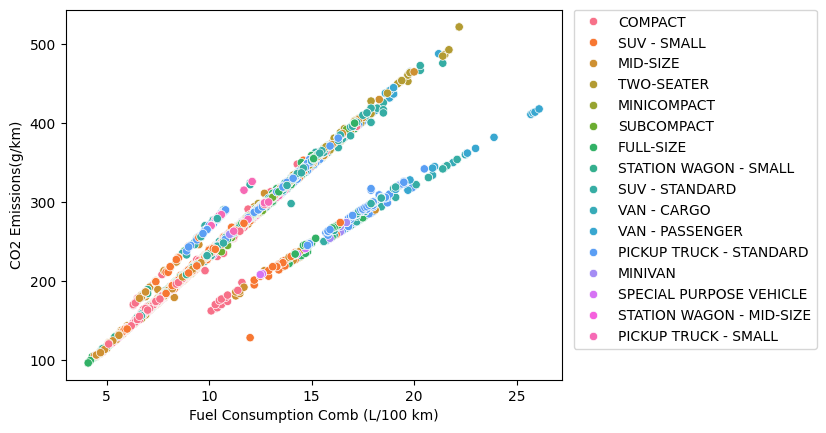

In [15]:
fig, ax = plt.subplots()
sns.scatterplot(
    x = 'Fuel Consumption Comb (L/100 km)',
    y = 'CO2 Emissions(g/km)',
    data = df_co2,
    hue = 'Vehicle Class',
    ax = ax
)
ax.legend(bbox_to_anchor=(1.01,1.02)) # 왼쪽 하단 0.0, 오른쪽 상단 1.1

In [16]:
# plotly scatter
fig = px.scatter(
    df_co2,
    x='Fuel Consumption Comb (L/100 km)',
    y='CO2 Emissions(g/km)',
    color='Vehicle Class',  # seaborn의 hue와 같은 역할
    title='Fuel Consumption vs CO2 Emissions by Vehicle Class'
)

# 범례 위치 조정 (예: 오른쪽 위)
fig.update_layout(legend_x=1, legend_y=1)

fig.show()

## 강조하기 
- 테두리 색, 굵기 조정

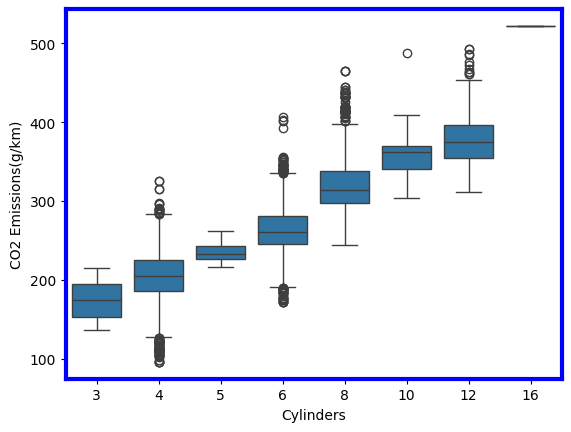

In [17]:
fig, ax = plt.subplots()
sns.boxplot(
    x = 'Cylinders', y = 'CO2 Emissions(g/km)',
    data = df_co2, ax = ax
)
spnies = ['left','right','top','bottom']
for spin in spnies:
    ax.spines[spin].set_color('blue')
    ax.spines[spin].set_linewidth(3)

In [18]:
# plotly 에서 테두리 강조하기
fig = px.scatter(
    df_co2,
    x='Fuel Consumption Comb (L/100 km)',
    y='CO2 Emissions(g/km)',
    color='Vehicle Class',
    title='Fuel Consumption vs CO2 Emissions by Vehicle Class'
)

fig.update_xaxes(  showline=True,          # 축 선을 표시할지 여부 (True/False)
    linecolor='black',      # 선 색상
    linewidth=5,            # 선 두께 (픽셀)
    mirror=True ) 

fig.update_yaxes(showline=True, linecolor='black', linewidth=2, mirror=True) 

fig.show()

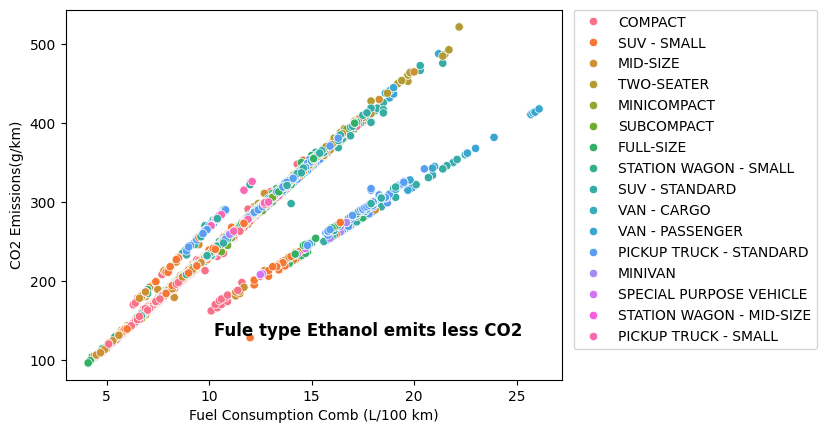

In [19]:
# text, annotate() 로 표시하기

fig, ax = plt.subplots()
sns.scatterplot(
    x = 'Fuel Consumption Comb (L/100 km)',
    y = 'CO2 Emissions(g/km)',
    data = df_co2,
    hue = 'Vehicle Class',
    ax = ax
)
ax.text(
    x = 0.3, y= 0.12, # 상대 좌표
    s = "Fule type Ethanol emits less CO2",
    fontdict={'fontsize': 12, 'weight':'bold'},
    transform = ax.transAxes # 현재의 위치 정보가 기준으로 하여 지정된다.(상대 좌표를 전달)
)
ax.legend(bbox_to_anchor=(1.01,1.02)) 

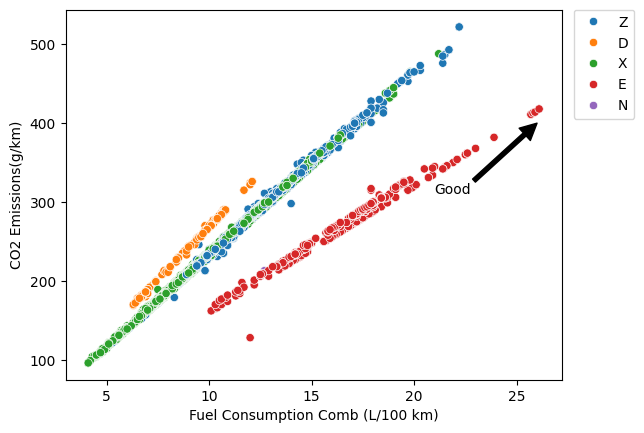

In [20]:
fig, ax = plt.subplots()
sns.scatterplot(
    x = 'Fuel Consumption Comb (L/100 km)',
    y = 'CO2 Emissions(g/km)',
    data = df_co2,
    hue = 'Fuel Type',
    ax = ax
)
ax.annotate(
    xy = (26,400), # 절대좌표
    text = "Good",
    xytext = (21,310), arrowprops = {'color': 'black', 'width':3}
)
ax.legend(bbox_to_anchor=(1.01,1.02)) 

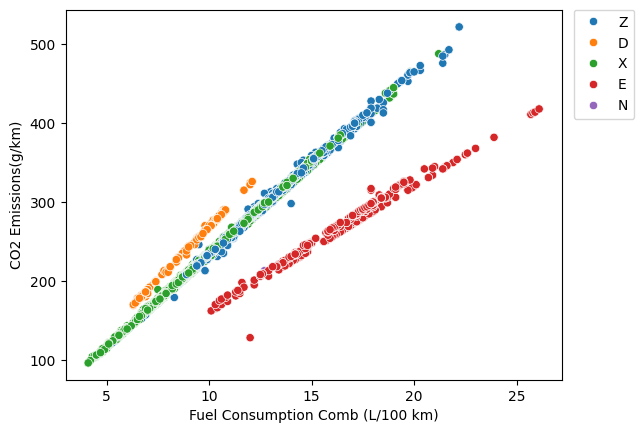

In [21]:
fig, ax = plt.subplots()
sns.scatterplot(
    x = 'Fuel Consumption Comb (L/100 km)',
    y = 'CO2 Emissions(g/km)',
    data = df_co2,
    hue = 'Fuel Type',
    ax = ax
)
ax.annotate(
    xy = (0.95, 0.7), # 절대좌표
    text = "Good",
    xytext = (0.73,0.5), arrowprops = {'color': 'black', 'width':3}
    , transform = ax.transAxes # 상대좌표
)
ax.legend(bbox_to_anchor=(1.01,1.02)) 

In [22]:
# plotly scatter
fig = px.scatter(
    data_frame = df_co2, x= 'Fuel Consumption Comb (L/100 km)'
    , y ='CO2 Emissions(g/km)' , color = 'Fuel Type', width = 800, height= 500
)

fig.update_layout(legend_x = 1.2, legend_y = 1)
fig.add_annotation(
    x = 0.9, y = 0.75,
    text = '???',
    yref='y domain', xref = 'x domain',
    showarrow= True, arrowhead= 2
)

fig.show()

In [23]:
# 조건을 이용한 강조하기
df_ins = pd.read_csv('data/product_inspection.csv')
df_ins['date'] = pd.to_datetime(df_ins['date'])
df_ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             429 non-null    datetime64[ns]
 1   inspection_step  429 non-null    object        
 2   value            429 non-null    float64       
 3   upper_spec       429 non-null    float64       
 4   target           429 non-null    float64       
 5   lower_spec       429 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 20.2+ KB


In [24]:
df_ins.head()

,date,inspection_step,value,upper_spec,target,lower_spec
0,2022-01-01,A,21.2,22.0,21.3,20.6
1,2022-01-02,A,21.7,22.0,21.3,20.6
2,2022-01-03,A,21.4,22.0,21.3,20.6
3,2022-01-04,A,21.5,22.0,21.3,20.6
4,2022-01-05,A,21.5,22.0,21.3,20.6


In [25]:
df_ins_A = df_ins.query("inspection_step == 'A'")
df_ins_A

,date,inspection_step,value,upper_spec,target,lower_spec
0,2022-01-01,A,21.2,22.0,21.3,20.6
1,2022-01-02,A,21.7,22.0,21.3,20.6
2,2022-01-03,A,21.4,22.0,21.3,20.6
3,2022-01-04,A,21.5,22.0,21.3,20.6
4,2022-01-05,A,21.5,22.0,21.3,20.6
...,...,...,...,...,...,...
138,2022-05-19,A,21.7,22.0,21.3,20.6
139,2022-05-20,A,21.6,22.0,21.3,20.6
140,2022-05-21,A,21.6,22.0,21.3,20.6
141,2022-05-22,A,21.4,22.0,21.3,20.6


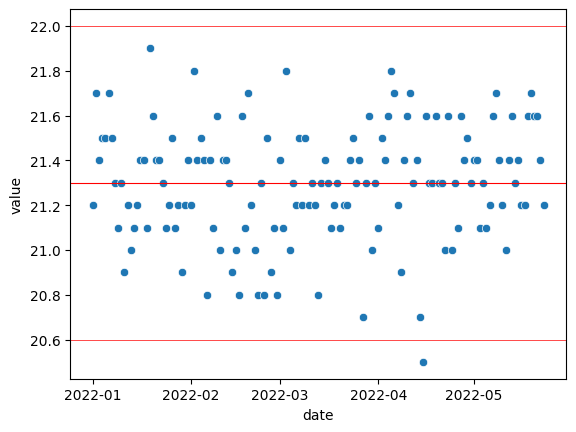

In [26]:
fig, ax = plt.subplots()
sns.scatterplot(x = 'date', y = 'value', data = df_ins_A, ax = ax)

# 수평선 그리기
ax.axhline(df_ins_A['lower_spec'].iloc[-1], color = 'red', linewidth = 0.5)
ax.axhline(df_ins_A['target'].iloc[-1], color = 'red', linewidth = 0.8)
ax.axhline(df_ins_A['upper_spec'].iloc[-1], color = 'red', linewidth = 0.5)

In [27]:
# plotly 
fig = px.scatter(df_ins_A, x = 'date', y = 'value', width = 500, height= 400)
fig.add_hline(df_ins_A['lower_spec'].iloc[-1],line_color ='red',legendwidth = 0.5)
fig.add_hline(df_ins_A['target'].iloc[-1],line_color ='red',legendwidth = 0.5)
fig.add_hline(df_ins_A['upper_spec'].iloc[-1],line_color ='red',legendwidth = 0.5)

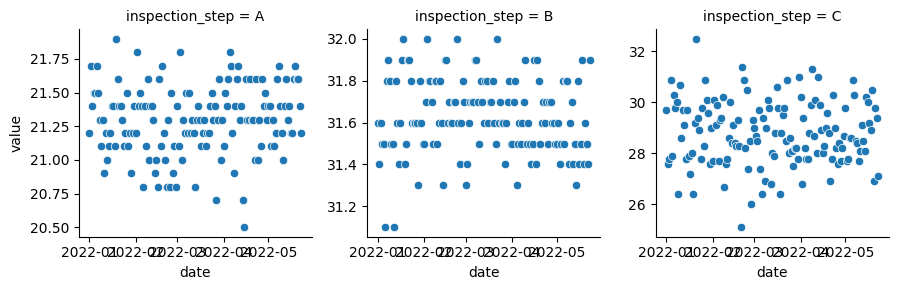

In [28]:
g = sns.FacetGrid(df_ins, sharex=False, sharey=False, col ='inspection_step' ) # 검사공정 값 차트 구분
g.map_dataframe(sns.scatterplot, x= 'date', y= 'value')

facetgrid.map() 함수를 위한 커스텀 정의

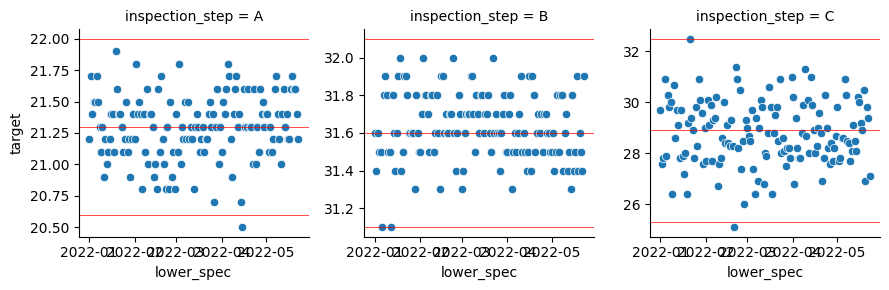

In [29]:
def custom(lower_spec,target,upper_spec,**kws):
    ax = plt.gca()
    # 수평선 그리기
    ax.axhline(lower_spec.iloc[-1], color = 'red', linewidth = 0.5)
    ax.axhline(target.iloc[-1], color = 'red', linewidth = 0.5)
    ax.axhline(upper_spec.iloc[-1], color = 'red', linewidth = 0.5)

g = sns.FacetGrid(df_ins, sharex=False, sharey=False, col ='inspection_step' ) # 검사공정 값 차트 구분
g.map_dataframe(sns.scatterplot, x= 'date', y= 'value')
g.map(custom, 'lower_spec','target','upper_spec')

plotly 

In [30]:
# Plotly에서의 활용
df_ins['date'] = pd.to_datetime(df_ins['date'])

fig = px.scatter(df_ins, x='date', y='value', facet_col='inspection_step')
print(fig.layout.annotations)

# For 문을 이용한 plotly에서의 facet mapping
fig = px.scatter(df_ins, x='date', y='value', facet_col='inspection_step', facet_col_spacing=0.05)

for idx in range(df_ins['inspection_step'].nunique()):
    step = fig.layout.annotations[idx].text.split('=')[1]
    fig.add_hline(
        y=df_ins.query('inspection_step == @step')['lower_spec'].iloc[-1],
        line_color='red', line_width=0.5, row=1, col=idx+1
    )
    fig.add_hline(
        y=df_ins.query('inspection_step == @step')['upper_spec'].iloc[-1],
        line_color='red', line_width=0.5, row=1, col=idx+1
    )
    fig.add_hline(
        y=df_ins.query('inspection_step == @step')['target'].iloc[-1],
        line_color='red', line_width=0.5, row=1, col=idx+1
    )

fig.update_yaxes(matches=None)
fig.update_yaxes(showticklabels=True)
fig.show()

(layout.Annotation({
    'font': {},
    'showarrow': False,
    'text': 'inspection_step=A',
    'x': 0.15999999999999998,
    'xanchor': 'center',
    'xref': 'paper',
    'y': 1.0,
    'yanchor': 'bottom',
    'yref': 'paper'
}), layout.Annotation({
    'font': {},
    'showarrow': False,
    'text': 'inspection_step=B',
    'x': 0.49999999999999994,
    'xanchor': 'center',
    'xref': 'paper',
    'y': 1.0,
    'yanchor': 'bottom',
    'yref': 'paper'
}), layout.Annotation({
    'font': {},
    'showarrow': False,
    'text': 'inspection_step=C',
    'x': 0.8399999999999999,
    'xanchor': 'center',
    'xref': 'paper',
    'y': 1.0,
    'yanchor': 'bottom',
    'yref': 'paper'
}))


In [31]:
# 특정 조건에 해당하는 값 찾기
# 각 공정 별로 관리 스펙에서 벗어난 자체가 있는 그래프 테두리 강조
df_ins['spec_out'] = (df_ins['value']  > df_ins['upper_spec']) | (df_ins['value'] < df_ins['lower_spec'])
df_ins.head()

,date,inspection_step,value,upper_spec,target,lower_spec,spec_out
0,2022-01-01,A,21.2,22.0,21.3,20.6,False
1,2022-01-02,A,21.7,22.0,21.3,20.6,False
2,2022-01-03,A,21.4,22.0,21.3,20.6,False
3,2022-01-04,A,21.5,22.0,21.3,20.6,False
4,2022-01-05,A,21.5,22.0,21.3,20.6,False


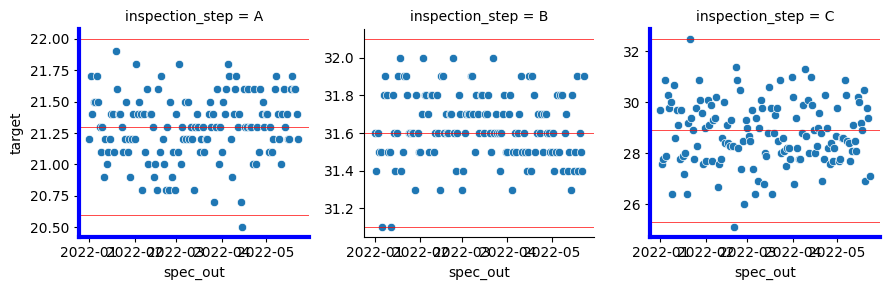

In [32]:
# 커스텀 함수 정의
def custom(lower_spec,target,upper_spec,**kws):
    ax = plt.gca()
    # 수평선 그리기
    ax.axhline(lower_spec.iloc[-1], color = 'red', linewidth = 0.5)
    ax.axhline(target.iloc[-1], color = 'red', linewidth = 0.5)
    ax.axhline(upper_spec.iloc[-1], color = 'red', linewidth = 0.5)

def if_spec_out(spec_out, **kws):
    if spec_out.sum() > 0 :
        ax = plt.gca()
        spins = ['left','bottom']
        for spine in spins:
            ax.spines[spine].set_color('blue')
            ax.spines[spine].set_linewidth(3)
    
g = sns.FacetGrid(df_ins, sharex=False, sharey=False, col ='inspection_step' ) # 검사공정 값 차트 구분
g.map_dataframe(sns.scatterplot, x= 'date', y= 'value')
g.map(custom, 'lower_spec','target','upper_spec')
g.map(if_spec_out, 'spec_out')

In [33]:
import plotly.express as px
import plotly.graph_objects as go

# date 타입 변환이 안돼 있다면 해줘야 함
df_ins['date'] = pd.to_datetime(df_ins['date'])

# 산점도 + facet
fig = px.scatter(
    df_ins,
    x='date',
    y='value',
    facet_col='inspection_step',
    color='spec_out',  # 이상값 여부에 따라 색 구분 (원하면 제거 가능)
    title="Inspection Step별 측정값 시각화",
    labels={'value': '측정값', 'date': '날짜'}
)

# 각 subplot에 하한선, 목표선, 상한선을 수동으로 추가
# facet_col_wrap 사용 안 했으므로 facet_col을 기준으로 layout.yaxisN 찾기

inspection_steps = df_ins['inspection_step'].unique()

for i, step in enumerate(inspection_steps):
    sub_df = df_ins[df_ins['inspection_step'] == step]

    lower = sub_df['lower_spec'].iloc[-1]
    target = sub_df['target'].iloc[-1]
    upper = sub_df['upper_spec'].iloc[-1]

    # Plotly는 첫 subplot은 xref='x', yref='y'로 시작
    xref = 'x' if i == 0 else f'x{i+1}'
    yref = 'y' if i == 0 else f'y{i+1}'

    for spec_val in [lower, target, upper]:
        fig.add_shape(
            type='line',
            x0=sub_df['date'].min(), x1=sub_df['date'].max(),
            y0=spec_val, y1=spec_val,
            line=dict(color='red', width=1),
            xref=xref,
            yref=yref
        )


# 레이아웃 조정 (테두리 강조는 Plotly에서 subplot마다 spine 변경 불가 → 대체 불가능)
fig.update_layout(height=400 * len(inspection_steps), showlegend=False)

fig.show()

## 기하급수적으로 커지는 y축 값을 변환해서 표현

In [35]:
df_covid = pd.read_csv('data/Covid19-India.csv')

<Axes: xlabel='date', ylabel='confirmed'>

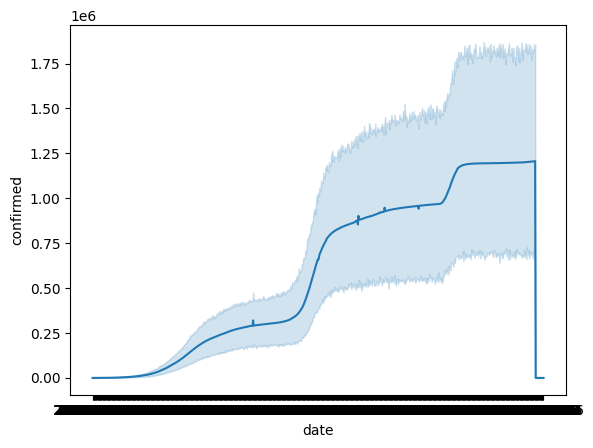

In [36]:
fig, ax = plt.subplots()
sns.lineplot(x = 'date', y = 'confirmed', data = df_covid, ax= ax)

In [37]:
df_covid_Mah = df_covid.loc[df_covid.region == 'Maharashtra']
df_covid_Mah

,date,region,confirmed,active,cured,deaths
15857,2020-03-12,Maharashtra,11,11,0,0
15858,2020-03-13,Maharashtra,11,11,0,0
15859,2020-03-14,Maharashtra,14,14,0,0
15860,2020-03-15,Maharashtra,31,31,0,0
15861,2020-03-16,Maharashtra,32,32,0,0
...,...,...,...,...,...,...
16662,2022-06-26,Maharashtra,7956173,24333,7783940,147900
16663,2022-06-27,Maharashtra,7962666,24608,7790153,147905
16664,2022-06-28,Maharashtra,7965035,25570,7791555,147910
16665,2022-06-29,Maharashtra,7968517,25481,7795121,147915


<Axes: xlabel='date', ylabel='confirmed'>

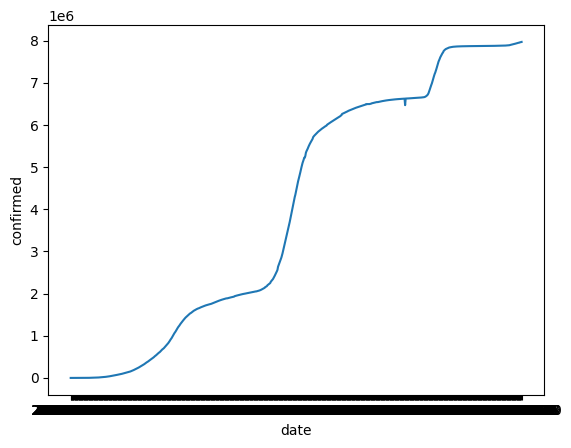

In [38]:
fig, ax = plt.subplots()
sns.lineplot(x = 'date',y = 'confirmed',data = df_covid_Mah, ax= ax)

y값을 로그 스케일

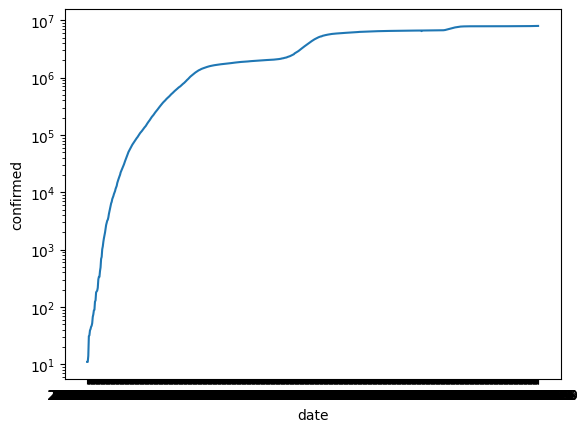

In [39]:
fig, ax = plt.subplots()
sns.lineplot(x = 'date',y = 'confirmed',data = df_covid_Mah, ax= ax)
ax.set_yscale('log')

In [40]:
# plotly 에서 로그 스케일
fig = px.line(
    df_covid_Mah, x = 'date', y = 'confirmed', width = 500, height = 400, log_y = True
)

fig.show()

# seaborn color palette, plotly color

<Axes: xlabel='total_bill', ylabel='tip'>

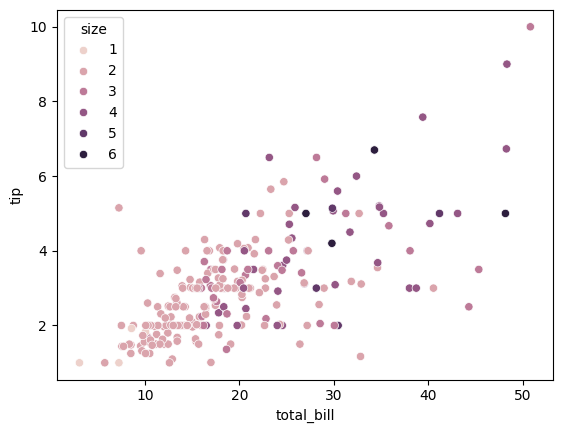

In [42]:
df_tips = sns.load_dataset('tips')
color = sns.color_palette('light:#006d2c', as_cmap=True)
fig, ax = plt.subplots()
sns.scatterplot(
    x = 'total_bill', y = 'tip', data = df_tips, ax = ax
    ,hue = 'size'
)

# plotly 색상 팔레트
- 범주형 데이터를 위한 팔레트: px.colors.qualitative
- 연속형 데이터를 위한 팔레트: px.colors.sequential
- 양극형 데이터를 위한 팔레트: px.colors.diverging
- 주기적 데이터를 위한 팔레트: px.colors.cyclical

In [44]:
fig = px.colors.qualitative.swatches()
fig

In [45]:
px.scatter(
    df_tips, x ='total_bill', y = 'tip', width= 500, height= 400,
    color= 'size',color_continuous_scale='Viridis'
)

In [ ]:
# 범주형 변수를 이용한 색상 표현하기
import plotly.express as px
df_tips = px.data.tips()

px.scatter(
    df_tips, x='total_bill', y='day',
    color='size', 
    width=500, height=400,
    color_discrete_sequence=px.colors.qualitative.Vivid  # 범주형 색상 팔레트 사용
)


In [48]:
fig = px.colors.sequential.swatches_continuous()
fig